# Paired Assessment

I'll be using the following libraries for this assessment:

- **Pandas:** Data manipulation and analysis.
- **Matplotlib:**
    - *Pyplot:* Data visualizations.
    - *Ticker:* Control how numerical values were displayed on graphs.

In [2]:
# Import all the libraries I'm gonna use.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
#Read in the csv as a pandas dataframe.

df = pd.read_csv('amazon.csv')

## Data Exploration

In the data exploration I found out that almost every column has 43,546 entries, except for "Randomized Latest Child Invoice", which makes sense, because not every invoice has a child invoice.

Also, "Payment Due Date" is in an object type, that means that I'll have to convert it to datetime when I'll use it.

In [5]:
# Explore the data part 1.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43546 entries, 0 to 43545
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Marketplace                      43546 non-null  object 
 1   Invoice Date                     43546 non-null  object 
 2   Payment Due Date                 43546 non-null  object 
 3   Invoice Status                   43546 non-null  object 
 4   Actual Paid Amount               43546 non-null  float64
 5   Paid Amount Currency             43546 non-null  object 
 6   Payee                            43546 non-null  object 
 7   Invoice Creation Date            43546 non-null  object 
 8   Randomized Invoice               43546 non-null  object 
 9   Invoice Amount                   43546 non-null  float64
 10  Invoice Currency                 43546 non-null  object 
 11  Any Deductions                   43546 non-null  bool   
 12  Quantity Variance 

In [6]:
# Explore the data part 2.

df.head(5)

,Marketplace,Invoice Date,Payment Due Date,Invoice Status,Actual Paid Amount,Paid Amount Currency,Payee,Invoice Creation Date,Randomized Invoice,Invoice Amount,Invoice Currency,Any Deductions,Quantity Variance Amount,Price Variance Amount,Quick Pay Discount Amount,Randomized Latest Child Invoice,Randomized PO
0,US,08/07/2021,14/08/2023,PAID,105.60,USD,GHIJK,08/07/2021,YYRFF3339197,105.60,USD,False,0.00,0.0,2.11,NaN,2G613DYP
1,US,08/07/2021,14/08/2023,PAID,18365.12,USD,ABCDE,08/07/2021,NQWXT9084454,18365.12,USD,False,0.00,0.0,367.56,NQWXT9084454SCR,937VLC8C
2,US,08/07/2021,14/08/2023,PAID,124.50,USD,ABCDE,08/07/2021,RVHXE4032614,124.50,USD,True,24.90,0.0,2.49,NaN,1ILHYU5O
3,US,08/07/2021,14/08/2023,PAID,3646.88,USD,ABCDE,08/07/2021,TJNYH1180722,3646.88,USD,True,39.64,0.0,72.94,NaN,5WSXDYJP
4,US,08/07/2021,14/08/2023,PAID,39213.50,USD,ABCDE,08/07/2021,TYPVC5809220,39979.30,USD,False,0.00,0.0,784.27,TYPVC5809220SCR,5REVZ6PF


Finally reviwed if the DataFrame has any duplicated values, but it does not.

In [8]:
# Validate if there's any duplicated values.

df.duplicated().value_counts()

False    43546
Name: count, dtype: int64

## Shortage Calculation

**Shortage:** A shortage occurs when Amazon believes that the supplier did not send the full inventory ordered by Amazon. As a result, Amazon will only pay part of the invoice.

Because Amazon is only paying **part of the invoice** that means there's a difference between Invoice Amount and Actual Paid Amount, I obtained the shortage by substracting.

**Shortage =** Invoice Amount - Actual Paid Amount

In [10]:
# Calculate Shortage in a new column (Shortage = Invoice Amount - Actual Paid Amount)

df['Shortage'] = df['Invoice Amount'] - df['Actual Paid Amount']
df.head(5)

,Marketplace,Invoice Date,Payment Due Date,Invoice Status,Actual Paid Amount,Paid Amount Currency,Payee,Invoice Creation Date,Randomized Invoice,Invoice Amount,Invoice Currency,Any Deductions,Quantity Variance Amount,Price Variance Amount,Quick Pay Discount Amount,Randomized Latest Child Invoice,Randomized PO,Shortage
0,US,08/07/2021,14/08/2023,PAID,105.60,USD,GHIJK,08/07/2021,YYRFF3339197,105.60,USD,False,0.00,0.0,2.11,NaN,2G613DYP,0.0
1,US,08/07/2021,14/08/2023,PAID,18365.12,USD,ABCDE,08/07/2021,NQWXT9084454,18365.12,USD,False,0.00,0.0,367.56,NQWXT9084454SCR,937VLC8C,0.0
2,US,08/07/2021,14/08/2023,PAID,124.50,USD,ABCDE,08/07/2021,RVHXE4032614,124.50,USD,True,24.90,0.0,2.49,NaN,1ILHYU5O,0.0
3,US,08/07/2021,14/08/2023,PAID,3646.88,USD,ABCDE,08/07/2021,TJNYH1180722,3646.88,USD,True,39.64,0.0,72.94,NaN,5WSXDYJP,0.0
4,US,08/07/2021,14/08/2023,PAID,39213.50,USD,ABCDE,08/07/2021,TYPVC5809220,39979.30,USD,False,0.00,0.0,784.27,TYPVC5809220SCR,5REVZ6PF,765.8


For summing all the shortage amount, I used a filter because in this column you can find negative values, which means credit notes or adjustments, but that it is not considered as shortage.

In [12]:
# Sum all shortages (only positive values of shortage, not negatives ones) ****NOTE****

total_shortage = df[df['Shortage'] > 0]['Shortage'].sum()
print('Total Shortage Amount: {:,.2f} USD'.format(total_shortage))

Total Shortage Amount: 9,863,044.24 USD


## Extract Year from "Payment Due Date"

As mentioned at the begging, I had to convert "Payment Due Date" column to datetime, because the original type was object. For this method I had to specify to pandas that the date starts with the day.

After converting the values, I only extract the year.

In [14]:
# Extract year from 'Payment Due Date' column.

df['Year From Payment Due Date'] = pd.to_datetime(df['Payment Due Date'], dayfirst=True).dt.year
df.head(5)

,Marketplace,Invoice Date,Payment Due Date,Invoice Status,Actual Paid Amount,Paid Amount Currency,Payee,Invoice Creation Date,Randomized Invoice,Invoice Amount,Invoice Currency,Any Deductions,Quantity Variance Amount,Price Variance Amount,Quick Pay Discount Amount,Randomized Latest Child Invoice,Randomized PO,Shortage,Year From Payment Due Date
0,US,08/07/2021,14/08/2023,PAID,105.60,USD,GHIJK,08/07/2021,YYRFF3339197,105.60,USD,False,0.00,0.0,2.11,NaN,2G613DYP,0.0,2023
1,US,08/07/2021,14/08/2023,PAID,18365.12,USD,ABCDE,08/07/2021,NQWXT9084454,18365.12,USD,False,0.00,0.0,367.56,NQWXT9084454SCR,937VLC8C,0.0,2023
2,US,08/07/2021,14/08/2023,PAID,124.50,USD,ABCDE,08/07/2021,RVHXE4032614,124.50,USD,True,24.90,0.0,2.49,NaN,1ILHYU5O,0.0,2023
3,US,08/07/2021,14/08/2023,PAID,3646.88,USD,ABCDE,08/07/2021,TJNYH1180722,3646.88,USD,True,39.64,0.0,72.94,NaN,5WSXDYJP,0.0,2023
4,US,08/07/2021,14/08/2023,PAID,39213.50,USD,ABCDE,08/07/2021,TYPVC5809220,39979.30,USD,False,0.00,0.0,784.27,TYPVC5809220SCR,5REVZ6PF,765.8,2023


Now, I created an extra DataFrame to store columns "Shortage" and "Year From Payment Due Date" only if shortage is positive. I grouped by the years summing shortage and I reset the index so that the year would not be used as the index.

In [16]:
# Made an extra dataframe just for 'Year From Payment Due Date' and 'Shortage'

shortage_df = df[df['Shortage']>0][['Shortage', 'Year From Payment Due Date']]
grouped_shortage_df = shortage_df.groupby(['Year From Payment Due Date']).sum().reset_index()
grouped_shortage_df.head()

,Year From Payment Due Date,Shortage
0,2021,1169668.07
1,2022,1095134.43
2,2023,356975.90
3,2024,1226208.12
4,2025,6015057.72


I created a visualization of the Shortage per Year to understand the trend over time. **As shown, in 2023 shortages decreased, in 2024 it incremented similar to shortages of 2021 and 2022 and in 2025 shortages increased significantly.**

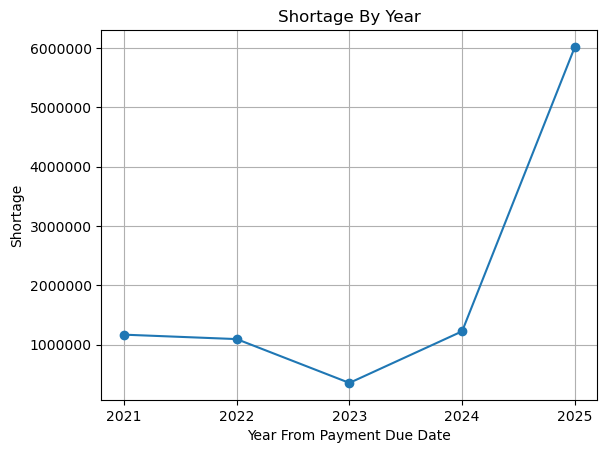

In [18]:
fig, ax = plt.subplots()
ax.plot(grouped_shortage_df['Year From Payment Due Date'], grouped_shortage_df['Shortage'], marker='o')
ax.set_xlabel("Year From Payment Due Date")
ax.set_ylabel("Shortage")
ax.set_title("Shortage By Year")
ax.set_xticks(grouped_shortage_df['Year From Payment Due Date'])
ax.grid(True)
formatter = mticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()

## Aged Shortage

**Aged Shortage:** Shortages that are older than 90 calendar days past the due date.

Because it is the shortage that have not been paid for more than 90 days since the payment due date, I had to calculate the days that have been passed from the payment due date till today.

**Aged Shortage Days=** Today - Payment Due Date

I created in a new column (Aged Shortage Days) today's date with method **to_datetime("today")** and I substracted from it "Payment Due Date" column in datetime type, then from that calculation I only subtracted the days.

I sorted values by "Aged Shortage Days" and as it shows, the minimum value is 122 days, that means that all shortages are aged shortages.

In [20]:
# Calculate Aged Shortage in a new column (Aged Shortage = Today - Payment Due Date)

df['Aged Shortage'] = pd.to_datetime("today") - pd.to_datetime(df['Payment Due Date'], dayfirst=True)
df['Aged Shortage Days'] = df['Aged Shortage'].dt.components['days']
data = df.sort_values(by='Aged Shortage Days', ascending=True)
data.head()

,Marketplace,Invoice Date,Payment Due Date,Invoice Status,Actual Paid Amount,Paid Amount Currency,Payee,Invoice Creation Date,Randomized Invoice,Invoice Amount,...,Any Deductions,Quantity Variance Amount,Price Variance Amount,Quick Pay Discount Amount,Randomized Latest Child Invoice,Randomized PO,Shortage,Year From Payment Due Date,Aged Shortage,Aged Shortage Days
43545,US,18/03/2025,16/06/2025,"PROCESSING, PENDING_AMAZON_ACTION",0.0,USD,ABCDE,18/03/2025,AYWON0132069,5100.0,...,False,0.0,0.0,0.0,NaN,9ZX186XW,5100.0,2025,123 days 14:11:10.727218,123
43524,US,18/03/2025,16/06/2025,"PROCESSING, PENDING_AMAZON_ACTION",0.0,USD,ABCDE,18/03/2025,VWIXB5728090,5100.0,...,False,0.0,0.0,0.0,NaN,2NUDYZ8S,5100.0,2025,123 days 14:11:10.727218,123
43527,US,18/03/2025,16/06/2025,"PROCESSING, PENDING_AMAZON_ACTION",0.0,USD,ABCDE,18/03/2025,XLNQO1586029,10200.0,...,False,0.0,0.0,0.0,NaN,3NZUXZ8O,10200.0,2025,123 days 14:11:10.727218,123
43529,US,18/03/2025,16/06/2025,"PROCESSING, PENDING_AMAZON_ACTION",0.0,USD,ABCDE,18/03/2025,RHFQQ4397667,54.0,...,False,0.0,0.0,0.0,NaN,8HWZFRBW,54.0,2025,123 days 14:11:10.727218,123
43536,US,18/03/2025,16/06/2025,"PROCESSING, PENDING_AMAZON_ACTION",0.0,USD,ABCDE,18/03/2025,MEHTX5446594,27.0,...,False,0.0,0.0,0.0,MEHTX5446594SCR,1CX8QIWZ,27.0,2025,123 days 14:11:10.727218,123


Now, I created an extra DataFrame to store columns "Shortage" and "Year From Payment Due Date" only if Shortage is positive and the Aged Shortage Days exceeds 90 days. I grouped by the years summing Shortage and I reset the index so that the year would not be used as the index.

In [22]:
# Made an extra dataframe just for 'Year From Payment Due Date' and 'Aged Shortage' just if 'Aged Shortage Days' it's greater than 90.

aged_shortage_df = df[(df['Shortage'] > 0) & (df['Aged Shortage Days']>90)][['Shortage', 'Year From Payment Due Date']]
aged_grouped_shortage_df = aged_shortage_df.groupby(['Year From Payment Due Date']).sum().reset_index()
aged_grouped_shortage_df.head()

,Year From Payment Due Date,Shortage
0,2021,1169668.07
1,2022,1095134.43
2,2023,356975.90
3,2024,1226208.12
4,2025,6015057.72


I made a bar graph that represents Aged Shortage per Year. The results are the same as the first graph in this document, **in 2023 shortages decreased, in 2024 it incremented similar to shortages of 2021 and 2022 and in 2025 shortages increased significantly.**

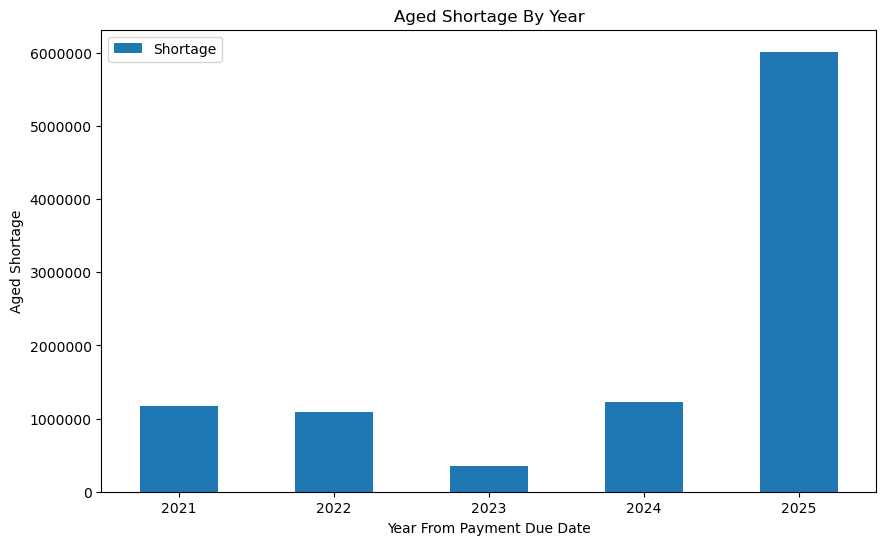

In [24]:
# Graph Aged Shortage by Year

ax = aged_grouped_shortage_df.plot(x='Year From Payment Due Date', y='Shortage', kind='bar', figsize=(10,6))
ax.set_xlabel('Year From Payment Due Date')
ax.set_ylabel('Aged Shortage')
formatter = mticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Aged Shortage By Year')
plt.xticks(rotation=0)
plt.show()

## Conclusion and Recommendations

As shown in the graphs above, all shortages presented **have not been paid for more than 90 days since the payment due date,** this converts it into Aged Shortages. If having a shortage indicates a problem, an aged shortage represents an urgent issue, more if we consider that **in this year the problem has inscreased significantly.**

The steps that we can follow from now, could be:

- **Improve Forecasting:** Review and efficient process for accurately forecast demand, defining first which items are the most demanded ones.
- **Configure Real Time Alerts:** Send real time alerts when inventory crosses  predefined thresholds and is running out of items.
- **Create a Automated Reports:** Set weekly automated dashboards and reports so every time occurs a shortage it will show in order to prevent that shortage to convert it into an age shortage. 

Additional business recommendations:

- **Improve Leadtime Accuracy:** Reduce supply delay by reviewing internal logistics plan and correcting any gap that may exist.
- **Optimize Inventory Management:** Ensure the inventory data is correct and without any discrepancies.

